# Modules

- files with a .py extension
- a module is a piece of code written by other people (or you) that you can reuse inside of your code to preform certain things (previously made solutions for specific problems)

### Why modules are useful:
* to organize larger projects into several smaller source code files - through this parts of code that belong together are stored together in a .py file - a <b> module </b>
* to make code more reusable, since modules can be imported selectively into new code
* smaller scripts can be easily packed into single files

- Small scripts can be easily packed into a single file.
- However, as soon as a program has more than a few hundred lines, we need to split the code into several modules, also because this makes the code easier to test and maintain

### There's a lot of existing modules
- Python's standard library is organized into modules (and packages that bundle multiple modules)
- third-party libraries are also available as modules

## 1. How to create a module

A module is nothing else than a .py file.
We can create a module by writing the file, which is often also called <i>script</i> in an IDE or a text editor, such as PyCharm or Spyder.

Then, the next step would be using a module by <i> importing </i> it. We will import our first module in the following paragraph.




* to start, I will create a new file in this folder called 'my_module.py'. Jupyter Notebooks open a text editor. This is not the best solution (because a text editor like this does not provide us with indentation, syntax highlighting,  debugging etc like an IDE - such as Pycharm or Spyder. Usually I would reccomend writing scripts in an IDE)

* in the [my_module.py](my_module.py) script, I've written a function called 'greeting' that returns  "Hello" and the desired name. Let's try it out in the next step.


## 2. How to use an existing module (importing modules)


In order to use a module in your own program, the module must be imported first:

~~~
import <module name>
~~~
    
After that the module is available with the functionality defined there. Let's try importing the module that we've created in the previous step:

In [1]:
import my_module

Now, that we've imported it, let's actually use it. the syntax is:
~~~
<module name>.<function call>
~~~

In [2]:
my_module.greeting('Lucija')

'Hello, Lucija'

We see that we can now, since we've imported the module, use the function that the module contains. We can do it however many times we want, we only need to import it once in a file.

Now, let's try using a module that is available in the standard Python library.The module `random` available in the standard library installed with Python provides a set of random functions. In order to use them, we must first import the module. 

In [3]:
import random

After that, we can have a random number generated, for example:

In [4]:
random.randint(0, 100)

98


* randint is a <b>function</b> available in the random module (https://docs.python.org/3/library/random.html). So, we can also say that a module contains a collection of functions, or that functions are a subset of modules. 

## 3. Namespaces

In the last example we did not use just any function named `randint`, but exactly the one provided by the module `random`.

Modules therefore not only structure the source code, but also form namespaces,
which prevents, for example, that two modules with the same name defined in different
modules from overlapping each other. 

To show this,there are two minimal modules in the directory where this notebook is located:

* first.py
* second.py

In both modules there is a function `echo()`, which we can use both in our program by using the namespaces.

In [5]:
import first
import second

In [6]:

first.some_function()

this is the output of the first module


In [7]:
second.some_function()

This is the output from the second module


The namespace is simply the name of the module (i.e. the file that defines the module).

So in the above example there is a module `first` (i.e. a file `first.py`) and a second module `second` (`second.py`).



## Import modules
We have already heard that we need to import modules before we can use them. There are several ways to do this. The simplest one we have already learned: We import the whole module while keeping the module name. As an example we use again a module from the standard library: `sys` provides information about the current system environment:

In [8]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [9]:
sys.platform

'win32'

### Import only a part of a module
Sometimes we are only interested in a small part of a module, for example if we only want to find out the currently used platform:

In [10]:
from sys import platform
platform

'win32'

**Caution**: Here we have imported something from a module into the global (or our own) namespace. We save ourselves some typing work by doing this, but we also get ourselves into some trouble for polluting our own namespace. There are good reasons not to do this:

* We have made it harder to trace our code, because when reading the code you have to figure out what this `platform` is all about - `sys.platform` is much clearer here.
* We can get side effects if we override our own variables, possibly unintentionally.

Here is an example:

In [11]:
version = '0.9 beta' # this is the version of our program

# imports should always happen at the top, but you can use them everywhere
from sys import version 
print(f'You are using MyProgram in version {version}')
print(f'You are using Python version {version}')

You are using MyProgram in version 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
You are using Python version 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


We have here (unintentionally) overlaid a previously existing variable `version` with `sys.version` during import. 

Even worse is this variant:

In [12]:
version = '0.9 beta'

# Imports should always happen at the top, but you can use them everywhere
from sys import *
print(f'You are using MyProgram in version {version}')
print(f'You are using Python version {version}')

You are using MyProgram in version 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
You are using Python version 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


Here we have imported **everything** from the `sys` module into our own namespace. We may not have been aware that there is a variable `version` in `sys` that overlays our own variable. Hard-to-find errors are bound to happen this way! If we had kept the namespace, this would not have happened:

In [13]:
version = '0.9 beta'

# Imports should always happen at the top, but you can use them everywhere
import sys
print(f'You are using MyProgram in version {version}')
print(f'You are using Python version {sys.version}')

You are using MyProgram in version 0.9 beta
You are using Python version 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


Small digression: if you want to determine what is present in a module (and what we imported all into our namespace in the last example), you can use the `dir()` function:

In [14]:
import sys
dir(sys)

['__breakpointhook__',
 '__displayhook__',
 '__doc__',
 '__excepthook__',
 '__interactivehook__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '__unraisablehook__',
 '_base_executable',
 '_clear_type_cache',
 '_current_frames',
 '_debugmallocstats',
 '_enablelegacywindowsfsencoding',
 '_framework',
 '_getframe',
 '_git',
 '_home',
 '_xoptions',
 'addaudithook',
 'api_version',
 'argv',
 'audit',
 'base_exec_prefix',
 'base_prefix',
 'breakpointhook',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'copyright',
 'displayhook',
 'dllhandle',
 'dont_write_bytecode',
 'exc_info',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'flags',
 'float_info',
 'float_repr_style',
 'get_asyncgen_hooks',
 'get_coroutine_origin_tracking_depth',
 'getallocatedblocks',
 'getdefaultencoding',
 'getfilesystemencodeerrors',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',
 'getswitchinterva

### Redefining namespaces
Some namespace names are very long and it is therefore tedious to always type them in. Therefore it is possible to assign a module its own name. `pyplot` is a module of the powerful `matplotlib` package. 

Attention: This package is not in the standard library and may have to be installed first. You can do this directly from the notebook (replace `pip` with `conda`,
if you are working in an Anaconda environment):

In [15]:
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Here first the cumbersome namespace variant:

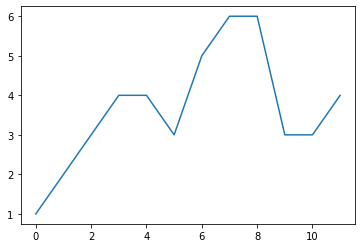

In [16]:
import matplotlib.pyplot
matplotlib.pyplot.plot([1, 2, 3, 4, 4, 3, 5, 6, 6, 3, 3, 4])
matplotlib.pyplot.show()

Normally, however, you write it this way to save yourself typing work:

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 4, 3, 5, 6, 6, 3, 3, 4])
plt.show()

By the `as` we have assigned an alias `plt` to the namespace `matplotlib.pyplot` in our program.

### Modules and docstrings
Just as a function can be described by a docstring, this also works for modules. To do this, simply insert the appropriate docstring right at the beginning of the module file. In the directory of this notebook you will find a file (i.e. a module) [mystring.py](mystring.py). Since this module has a DocString, you can read it:

In [17]:
import my_string
help(my_string)

Help on module my_string:

NAME
    my_string

FILE
    c:\users\krusic\programming1ws22\modules\my_string.py




In [ ]:
mystring.reverse('abc')

In [19]:
help(my_string.reverse)

AttributeError: module 'my_string' has no attribute 'reverse'

In [ ]:
mystring.distinct_len('Mississippi')

In [ ]:
help(mystring.distinct_len)

## How are modules found?
Modules can be located in different places in the file system. Here is a short description of where and how Python searches for modules. Thereby a certain order is used. As soon as the module to be imported (or -- attention! -- a module with the same name) is found, it is used. This order is:

1. the current directory.
1. all directories defined in the `PYTHONPATH` environment variable.
1. depending on the called Python version in certain directories, where for example the standard library is located.

The `sys` module knows where to search:

In [20]:
import sys
sys.path

['C:\\Users\\krusic\\programming1WS22\\modules',
 'C:\\Users\\krusic\\Anaconda3\\python39.zip',
 'C:\\Users\\krusic\\Anaconda3\\DLLs',
 'C:\\Users\\krusic\\Anaconda3\\lib',
 'C:\\Users\\krusic\\Anaconda3',
 '',
 'C:\\Users\\krusic\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\krusic\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\krusic\\Anaconda3\\lib\\site-packages\\unknown-0.0.0-py3.9.egg',
 'C:\\Users\\krusic\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\krusic\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\krusic\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\krusic\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\krusic\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\krusic\\.ipython']

By the way, `sys.path` is a normal list which can be extended, for example (but which is not a very good idea if you want to pass on your program).

## Modules and bytecode
The first time a module is loaded, Python translates the code into bytecode and saves it to a separate file. This has the advantage that the module can be loaded faster the next time it is used. These bytecode files have the filename extension `.pyc` and are located under Python3 in the directory `__pycache__`. Both this directory and individual `pyc` files can be safely deleted because they are automatically regenerated when needed. They are also automatically regenerated if the contents of the corresponding `.py` file change.

# Packages
If you want to organize larger projects more deeply, you can combine multiple modules
(and even subpackages) into one package.

A package is nothing more than a directory that contains modules. However, such a directory
package is only created when the directory contains a file called
directory contains a file `__init__.py`. This file can be empty.

Here is a (fictional) example:

~~~
mypackage
|-- __init__.py
|-- module1.py
|-- module2.py
|-- mysubpackage
    |-- __init__.py
    |-- module_a.py
    |-- module_b.py
~~~

A module in a package is addressed separated by the dot operator:

~~~
>>> import os
>>> if os.path.exists('data.csv'):
...
~~~
